<div class="alert alert-block alert-info"><font size="6"><b>Sprint 14 Task 1 (S14_T01)</b></font><h6 align="right"><u>Author: Alberto Achaval</u></h6></div>

## <SPAN style=color:#1F618D>Level 1</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Create a NoSQL database using MongoDB. Add some sample data that will allow you to check that you are able to process the information in a basic way.</SPAN>

As usual we start by importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pymongo import MongoClient # connect Python to Mongodb

In [2]:
MONGO_URI = 'mongodb://localhost'
client = MongoClient(MONGO_URI) # connecting with server in localhost

Let's check for all the Databases we have:

In [3]:
client.list_database_names()

['admin', 'config', 'local']

Now let's create a new database and collection:

In [4]:
db = client['books']
collection = db['classics']
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'books')

Let's load some data about books and their authors:

In [5]:
book_one = {"_id": 1, "title": "Pride and Prejudice", "author": "Jane Austen" , "year": 1813}
book_two = {"_id": 2, "title": "The Great Gatsby ", "author": "Harper Lee" , "year": 1960}
book_three = {"_id": 3, "title": "Pride and Prejudice", "author": "F. Scott Fitzgerald" , "year": 1925}
book_four = {"_id": 4, "title": "One Hundred Years of Solitude", "author": "Gabriel García Márquez" , "year": 1967}
book_five = {"_id": 5, "title": "In Cold Blood", "author": "Truman Capote" , "year": 1965}
book_six = {"_id": 6, "title": "Wide Sargasso Sea", "author": "Jean Rhys" , "year": 1966}
book_seven = {"_id": 7, "title": "Brave New World", "author": "Aldous Huxley" , "year": 1932}
book_eight = {"_id": 8, "title": "I Capture The Castle", "author": "Dodie Smith" , "year": 1948}
book_nine = {"_id": 9, "title": "Jane Eyre", "author": "Charlotte Bronte" , "year": 1847}
book_ten = {"_id": 10, "title": "Crime and Punishment ", "author": "Fyodor Dostoevsky" , "year": 1866}
book_eleven = {"_id": 11, "title": "The Secret History", "author": "Donna Tartt" , "year": 1992}
book_twelve = {"_id": 12, "title": "The Call of the Wild", "author": "Jack London" , "year": 1903}
book_thirteen = {"_id": 13, "title": "The Chrysalids", "author": "John Wyndham" , "year": 1955}

collection.insert_many([
                        book_one, 
                        book_two, 
                        book_three, 
                        book_four, 
                        book_five, 
                        book_six, 
                        book_seven, 
                        book_eight, 
                        book_nine, 
                        book_ten, 
                        book_eleven, 
                        book_twelve, 
                        book_thirteen
                       ])

Let's make some queries in order to see the data we have just uploaded:

In [6]:
results = collection.find()

for r in results:
    print(r)

{'_id': 1, 'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813}
{'_id': 2, 'title': 'The Great Gatsby ', 'author': 'Harper Lee', 'year': 1960}
{'_id': 3, 'title': 'Pride and Prejudice', 'author': 'F. Scott Fitzgerald', 'year': 1925}
{'_id': 4, 'title': 'One Hundred Years of Solitude', 'author': 'Gabriel García Márquez', 'year': 1967}
{'_id': 5, 'title': 'In Cold Blood', 'author': 'Truman Capote', 'year': 1965}
{'_id': 6, 'title': 'Wide Sargasso Sea', 'author': 'Jean Rhys', 'year': 1966}
{'_id': 7, 'title': 'Brave New World', 'author': 'Aldous Huxley', 'year': 1932}
{'_id': 8, 'title': 'I Capture The Castle', 'author': 'Dodie Smith', 'year': 1948}
{'_id': 9, 'title': 'Jane Eyre', 'author': 'Charlotte Bronte', 'year': 1847}
{'_id': 10, 'title': 'Crime and Punishment ', 'author': 'Fyodor Dostoevsky', 'year': 1866}
{'_id': 11, 'title': 'The Secret History', 'author': 'Donna Tartt', 'year': 1992}
{'_id': 12, 'title': 'The Call of the Wild', 'author': 'Jack London', 'year':

Let's filter only the years:

In [7]:
results = collection.find()

for r in results:
    print(r["year"])

1813
1960
1925
1967
1965
1966
1932
1948
1847
1866
1992
1903
1955


Filter by author name:

In [8]:
results = collection.find({'author': 'Jack London'})

for r in results:
    print(r)

{'_id': 12, 'title': 'The Call of the Wild', 'author': 'Jack London', 'year': 1903}


Delete a document:

In [9]:
collection.delete_one({'author': 'Jack London'})

In [10]:
results = collection.find({'author': 'Jack London'})

for r in results:
    print(r)

Nothing! Deleted!

Now let's update some data:

In [11]:
collection.update_one({'author': 'Aldous Huxley'}, {'$set': {'author': 'A. Huxley'}})

In [12]:
results = collection.find()

for r in results:
    print(r["author"])

Jane Austen
Harper Lee
F. Scott Fitzgerald
Gabriel García Márquez
Truman Capote
Jean Rhys
A. Huxley
Dodie Smith
Charlotte Bronte
Fyodor Dostoevsky
Donna Tartt
John Wyndham


### <SPAN style=color:#1F618D>Practice 2</SPAN>

<SPAN style=color:#1F618D>Connect the NoSQL database to Python using pymongo for example.</SPAN>

It was done in Practice 1.

## <SPAN style=color:#1F618D>Level 2</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Load some simple queries to a Pandas Dataframe.</SPAN>

In [13]:
results = collection.find()

for r in results:
    print(r)

{'_id': 1, 'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813}
{'_id': 2, 'title': 'The Great Gatsby ', 'author': 'Harper Lee', 'year': 1960}
{'_id': 3, 'title': 'Pride and Prejudice', 'author': 'F. Scott Fitzgerald', 'year': 1925}
{'_id': 4, 'title': 'One Hundred Years of Solitude', 'author': 'Gabriel García Márquez', 'year': 1967}
{'_id': 5, 'title': 'In Cold Blood', 'author': 'Truman Capote', 'year': 1965}
{'_id': 6, 'title': 'Wide Sargasso Sea', 'author': 'Jean Rhys', 'year': 1966}
{'_id': 7, 'title': 'Brave New World', 'author': 'A. Huxley', 'year': 1932}
{'_id': 8, 'title': 'I Capture The Castle', 'author': 'Dodie Smith', 'year': 1948}
{'_id': 9, 'title': 'Jane Eyre', 'author': 'Charlotte Bronte', 'year': 1847}
{'_id': 10, 'title': 'Crime and Punishment ', 'author': 'Fyodor Dostoevsky', 'year': 1866}
{'_id': 11, 'title': 'The Secret History', 'author': 'Donna Tartt', 'year': 1992}
{'_id': 13, 'title': 'The Chrysalids', 'author': 'John Wyndham', 'year': 1955}


In [14]:
collection_df = pd.DataFrame(list(collection.find()))
collection_df

,_id,title,author,year
0,1,Pride and Prejudice,Jane Austen,1813
1,2,The Great Gatsby,Harper Lee,1960
2,3,Pride and Prejudice,F. Scott Fitzgerald,1925
3,4,One Hundred Years of Solitude,Gabriel García Márquez,1967
4,5,In Cold Blood,Truman Capote,1965
5,6,Wide Sargasso Sea,Jean Rhys,1966
6,7,Brave New World,A. Huxley,1932
7,8,I Capture The Castle,Dodie Smith,1948
8,9,Jane Eyre,Charlotte Bronte,1847
9,10,Crime and Punishment,Fyodor Dostoevsky,1866


#### Loading a dataframe from Pandas to a Mongodb database:

The following dataframe has a collection af books wit some qualitative and quantitative features.

* **isbn**: Another unique number to identify the book, the International Standard Book Number.
* **ratings_count**: Total number of ratings the book received.
* **text_review_count**: Total number of written text reviews the book received. 


Source: https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks

In [15]:
books_df = pd.read_csv("books.csv", error_bad_lines=False)
books_df.head()

C:\Users\AlbertoAR\AppData\Local\Temp\ipykernel_13628\886628468.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_df = pd.read_csv("books.csv", error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [16]:
books_df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


Now let's store it in our Mongodb database:

In [17]:
data_dict = books_df.to_dict("records") # transform Dataframe to dict for Mongodb

In [18]:
collection.insert_many(data_dict) # insert into 'books' database

Let's go back to a Pandas Dataframe containing books with average_rating > (grater than) 4:

In [19]:
collection_df2 = pd.DataFrame(list(collection.find({"average_rating": {"$gt": 4}})))
collection_df2.sample(5)

,_id,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
345,628e15dea350a56afc498101,2718,Salt in His Shoes: Michael Jordan in Pursuit o...,Deloris Jordan/Kadir Nelson/Roslyn M. Jordan,4.20,0689834195,9780689834196,eng,32,1178,173,11/1/2003,Simon Schuster Books for Young Readers
1418,628e15dea350a56afc498a9c,12018,Exzession (Culture #5),Iain M. Banks/Irene Bonhorst,4.21,3453196791,9783453196797,ger,655,24,2,3/1/2002,Heyne
747,628e15dea350a56afc4984c5,6290,The Road to Serfdom,Friedrich A. Hayek,4.18,0415253896,9780415253895,eng,272,258,23,3/9/2006,Routledge
2270,628e15dea350a56afc4991b8,18420,Hands of Light: A Guide to Healing Through the...,Barbara Ann Brennan/Jos. A. Smith,4.27,0553345397,9780553345391,eng,320,10878,106,2/1/1990,Bantam
171,628e15dea350a56afc497f8f,1473,Medea and Other Plays,Euripides/John Davie/Richard Rutherford,4.03,0140449299,9780140449297,eng,206,9197,120,3/27/2003,Penguin Books


## <SPAN style=color:#1F618D>Level 3</SPAN>

### <SPAN style=color:#1F618D>Practice 1</SPAN>

<SPAN style=color:#1F618D>Generate a statistical summary of the information contained in the database.</SPAN>

Let's do a basic statistical summary of the books database that we have on collection_df2:

In [20]:
collection_df2.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,4735.000000,4735.000000,4.735000e+03,4735.000000,4.735000e+03,4735.00000
mean,20737.281521,4.198929,9.760811e+12,374.375924,2.201569e+04,630.45660
std,12799.384323,0.154100,4.376564e+11,304.257839,1.197278e+05,2896.91091
min,1.000000,4.010000,8.987060e+09,0.000000,0.000000e+00,0.00000
25%,10082.000000,4.080000,9.780375e+12,192.000000,1.380000e+02,10.00000
50%,19199.000000,4.170000,9.780672e+12,316.000000,9.190000e+02,49.00000
75%,31089.500000,4.280000,9.780941e+12,472.000000,6.263500e+03,250.00000
max,45633.000000,5.000000,9.790008e+12,6576.000000,2.530894e+06,86881.00000


In [21]:
collection_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   _id                 4735 non-null   object 
 1   bookID              4735 non-null   int64  
 2   title               4735 non-null   object 
 3   authors             4735 non-null   object 
 4   average_rating      4735 non-null   float64
 5   isbn                4735 non-null   object 
 6   isbn13              4735 non-null   int64  
 7   language_code       4735 non-null   object 
 8     num_pages         4735 non-null   int64  
 9   ratings_count       4735 non-null   int64  
 10  text_reviews_count  4735 non-null   int64  
 11  publication_date    4735 non-null   object 
 12  publisher           4735 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 481.0+ KB


In [22]:
collection_df2.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

In [23]:
collection_df2.isnull().sum().sum()

0

No NaN's.

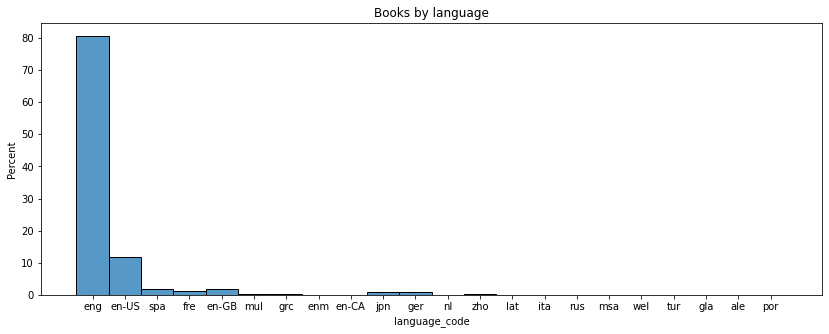

In [24]:
fig, ax = plt.subplots(figsize = (14, 5))

sns.histplot(collection_df2.language_code, stat = 'percent')

plt.title('Books by language')

plt.show()

English language books are by far the most common with over 80% of the share. 

Let's look for relationships between numerical variables. First we need to scale data.

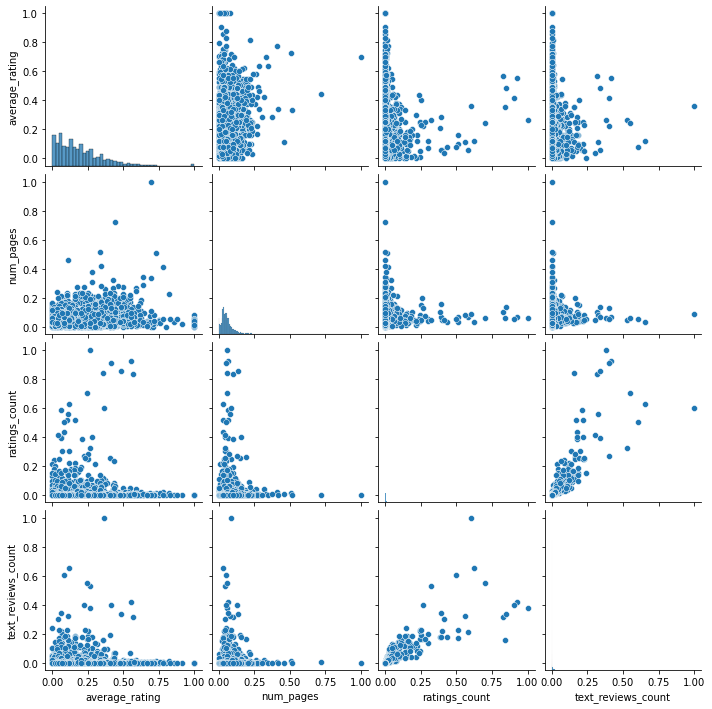

In [25]:
from sklearn.preprocessing import MinMaxScaler

num_var = collection_df2[['average_rating', 'num_pages', 'ratings_count', 'text_reviews_count']]

num_var_nm = pd.DataFrame(MinMaxScaler().fit_transform(num_var), columns = num_var.columns)

sns.pairplot(num_var_nm)

plt.show()

We have some linear relationship with rating_counts and text_review_counts.